In [149]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [150]:
# Importing database
df = pd.read_csv("vgsales.csv")

In [151]:
# Getting to know the database
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [152]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [153]:
df.shape

(16598, 11)

In [154]:
# Removing where year is not defined
df.dropna(subset=['Year'], inplace=True)
df.shape

(16327, 11)

In [155]:
# Remove Years with 0~ records
years_to_drop = [1985, 1988, 1992, 1994, 2017, 2020]
df.drop(df[df['Year'].isin(years_to_drop)].index, inplace=True)
df.shape

(16130, 11)

In [156]:
# Year float to int
df['Year'] = df['Year'].astype(np.int64)

In [157]:
#Valores max e min do Year
max_year = df['Year'].max()
min_year = df['Year'].min()
(max_year, min_year)

(2016, 1980)

In [158]:
# Dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(16130, 11)

In [159]:
# Getting all platforms
platforms = df['Platform'].unique()
platforms

array(['Wii', 'GB', 'DS', 'NES', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'PCFX'], dtype=object)

In [160]:
# Dropping rows where num games/platforms is low
games_by_plat = df.groupby(by="Platform").size()
res = games_by_plat[games_by_plat > 250]
res
df = df[df["Platform"].isin(res.index)]
df.shape

(15103, 11)

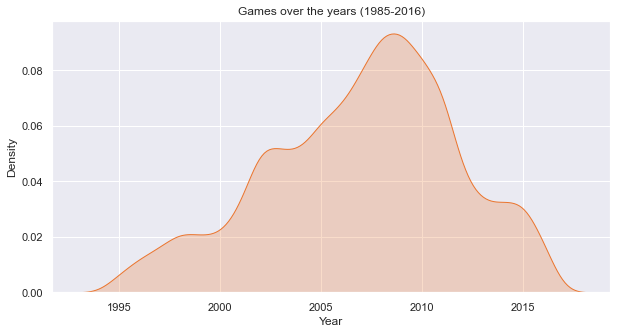

In [161]:
# Games over year
sns.set(rc={'figure.figsize':(10, 5)})
sns.kdeplot(df['Year'], shade=True, color="#EA752E").set(title="Games over the years (1985-2016)")
plt.show()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1172
PC       930
GBA      811
XB       803
GC       542
3DS      500
PSV      410
PS4      335
N64      316
dtype: int64


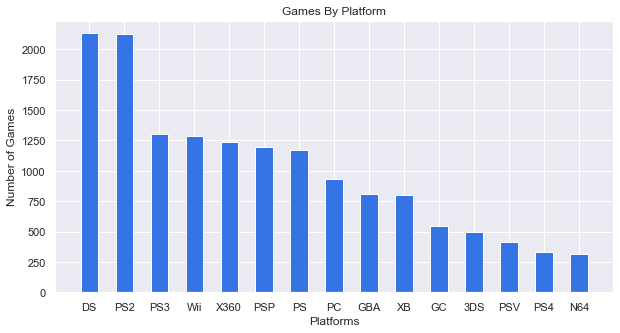

In [162]:
# Plotting games/platform
games_by_plat = df.groupby(by="Platform").size().sort_values(ascending=False)
print(games_by_plat)
plt.figure(figsize=(10, 5))
plt.bar(games_by_plat.index,games_by_plat.values, color="#3674E6", width=0.5)
plt.title("Games By Platform")
plt.xlabel("Platforms")
plt.ylabel("Number of Games")
plt.show()

Platform
PS2     1233.46
X360     969.61
PS3      949.35
Wii      909.81
DS       818.65
PS       721.37
GBA      313.56
PSP      291.71
PS4      278.07
XB       252.09
3DS      246.28
PC       239.12
N64      218.21
GC       197.14
PSV       61.61
Name: Global_Sales, dtype: float64


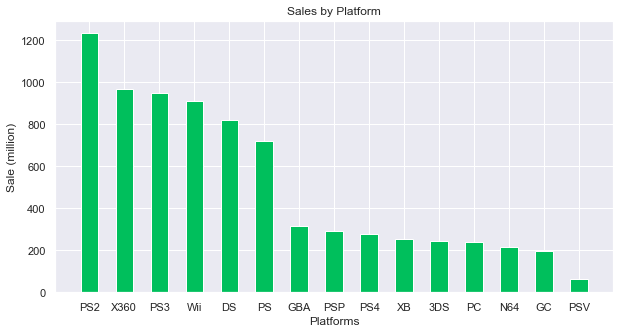

In [163]:
# Sales by platform
sales_by_platform = df.groupby(by="Platform")['Global_Sales'].sum().sort_values(ascending=False)
print(sales_by_platform)
plt.figure(figsize=(10, 5))
plt.bar(sales_by_platform.index,sales_by_platform.values, color="#00bf5c", width=0.5)
plt.title("Sales by Platform")
plt.xlabel("Platforms")
plt.ylabel("Sale (million)")
plt.show()

(0               Wii Sports
2           Mario Kart Wii
3        Wii Sports Resort
6    New Super Mario Bros.
7                 Wii Play
Name: Name, dtype: object, 0    Wii
2    Wii
3    Wii
6     DS
7    Wii
Name: Platform, dtype: object)


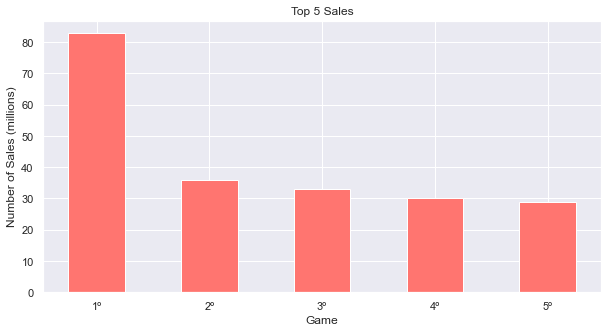

In [164]:
# Top 5 global sales
top5sales = df.sort_values(by='Global_Sales', ascending=False)[0:5]
print((top5sales['Name'], top5sales['Platform']))
plt.figure()
plt.bar(["1º", "2º", "3º", "4º", "5º"],top5sales['Global_Sales'], width=0.5, color="#ff7570")
plt.title("Top 5 Sales")
plt.xlabel("Game")
plt.ylabel("Number of Sales (millions)")
plt.show()

Genre
Action          3025
Sports          2145
Misc            1623
Role-Playing    1336
Adventure       1206
Racing          1167
Shooter         1165
Simulation       817
Platform         759
Fighting         732
Strategy         617
Puzzle           511
dtype: int64


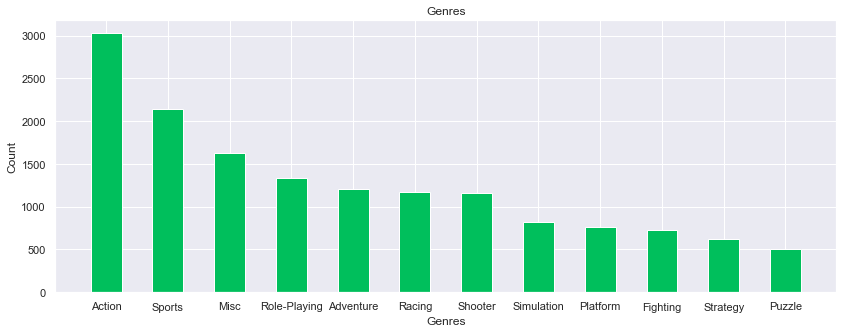

In [165]:
# Genres
genres_count = df.groupby(by="Genre").size().sort_values(ascending=False)
print(genres_count)
plt.figure(figsize=(14, 5))
plt.bar(genres_count.index,genres_count.values, color="#00bf5c", width=0.5)
plt.title("Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

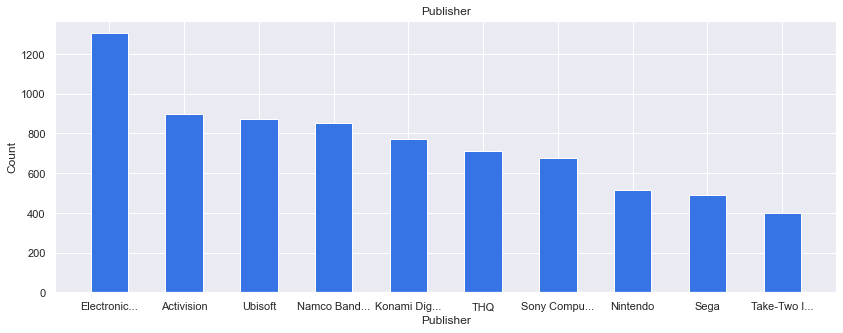

In [166]:
# Publishers
publisher_count = df.groupby(by="Publisher").size().sort_values(ascending=False)
publisher_count = publisher_count[0:10]
plt.figure(figsize=(14, 5))
plt.bar(list(map(lambda x: x if len(x) <= 13 else x[0:10]+"...", publisher_count.index)),publisher_count.values, color="#3674E6", width=0.5)
plt.title("Publisher")
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.show()

In [167]:
def df_from_tables(dframe, left, up):
    left_c = dframe[left].unique()
    up_c = dframe[up].unique()
    order = dict()
    for idx, value in enumerate(up_c):
        order[value] = idx
    matrix = np.zeros((len(left_c), len(up_c)))
    for l_c_idx, l_c in enumerate(left_c):
        row = dframe[dframe[left] == l_c].groupby(by=up).size()
        for u_c in row.index:
            matrix[l_c_idx][order[u_c]] = row.at[u_c]
    return pd.DataFrame(matrix, index=left_c, columns=up_c)

In [168]:
df_year_to_plat = df_from_tables(df, "Year", "Platform")
df_year_to_plat

,Wii,DS,X360,PS3,PS2,GBA,3DS,PS4,N64,PS,XB,PC,PSP,GC,PSV
2006,44.0,202.0,93.0,27.0,259.0,39.0,0.0,0.0,0.0,0.0,62.0,52.0,190.0,40.0,0.0
2008,282.0,492.0,146.0,139.0,191.0,0.0,0.0,0.0,0.0,0.0,1.0,76.0,100.0,0.0,0.0
2009,325.0,405.0,173.0,162.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,161.0,0.0,0.0
2005,0.0,118.0,18.0,0.0,260.0,135.0,0.0,0.0,0.0,0.0,179.0,37.0,97.0,97.0,0.0
2007,187.0,377.0,123.0,90.0,214.0,6.0,0.0,0.0,0.0,0.0,3.0,63.0,134.0,4.0,0.0
2010,254.0,326.0,182.0,181.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,188.0,0.0,0.0
2013,12.0,9.0,75.0,127.0,0.0,0.0,91.0,16.0,0.0,0.0,0.0,38.0,54.0,0.0,63.0
2004,0.0,23.0,0.0,0.0,259.0,175.0,0.0,0.0,0.0,0.0,177.0,31.0,15.0,83.0,0.0
2002,0.0,0.0,0.0,0.0,280.0,198.0,0.0,0.0,1.0,20.0,158.0,19.0,0.0,152.0,0.0
2001,0.0,0.0,0.0,0.0,185.0,107.0,0.0,0.0,9.0,91.0,33.0,15.0,0.0,22.0,0.0


In [169]:
def plot_df(dframe: pd.DataFrame, xl, yl, title, max_num=4, linewidth=1):
    cloop = int(len(dframe.columns) / max_num)
    for i in range(0, cloop):
        plt.figure(figsize=(14, 5))
        for j in dframe.columns[i*max_num:(i*max_num)+max_num]:
            sns.lineplot(data=dframe[j], linewidth=linewidth)
            plt.xlabel(xl)
            plt.legend(dframe.columns[i*max_num:(i*max_num)+max_num])
            plt.title(title)
            plt.ylabel(yl)
        plt.show()

    if(len(dframe.columns) % max_num != 0):
        print("oi")
        plt.figure(figsize=(14, 5))
        for i in range(cloop*max_num, len(dframe.columns)):
            sns.lineplot(data=dframe[dframe.columns[i]], linewidth=linewidth)
            plt.xlabel(xl)
            plt.legend(dframe.columns[cloop*max_num: len(dframe.columns)])
            plt.title(title)
            plt.ylabel(yl)
        plt.show()

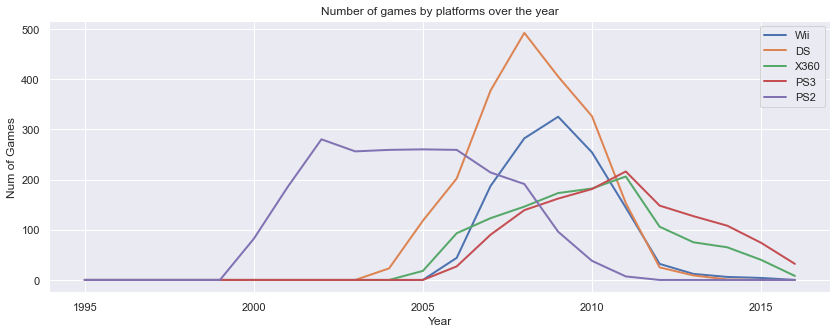

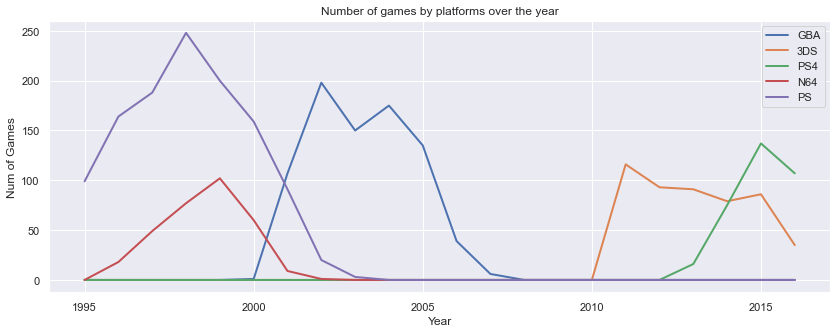

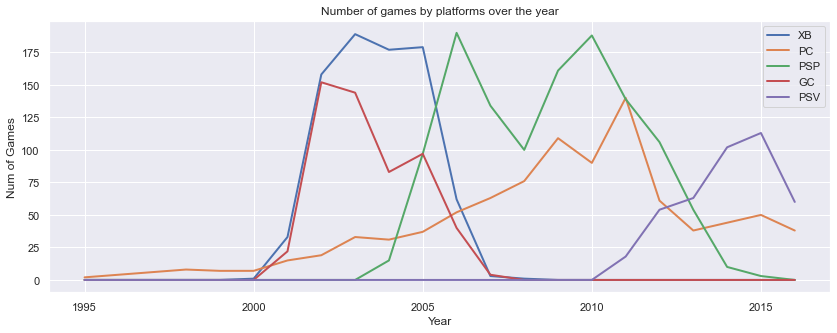

In [170]:
plot_df(df_year_to_plat, "Year", "Num of Games", "Number of games by platforms over the year", 5, linewidth=2)

In [171]:
#Genres over the years
df_year_to_genre = df_from_tables(df, "Year", "Genre")
df_year_to_genre

,Sports,Racing,Platform,Misc,Simulation,Action,Role-Playing,Puzzle,Shooter,Fighting,Adventure,Strategy
2006,138.0,75.0,54.0,109.0,58.0,184.0,110.0,43.0,69.0,55.0,71.0,42.0
2008,200.0,82.0,62.0,212.0,119.0,221.0,112.0,64.0,83.0,57.0,165.0,50.0
2009,184.0,84.0,29.0,207.0,123.0,272.0,103.0,79.0,91.0,53.0,141.0,65.0
2005,122.0,77.0,83.0,115.0,38.0,192.0,71.0,33.0,96.0,43.0,42.0,29.0
2007,167.0,86.0,42.0,151.0,90.0,211.0,103.0,66.0,84.0,50.0,84.0,67.0
2010,186.0,57.0,31.0,201.0,82.0,226.0,103.0,45.0,81.0,40.0,154.0,53.0
2013,46.0,13.0,28.0,35.0,16.0,131.0,70.0,2.0,52.0,16.0,60.0,16.0
2004,106.0,71.0,66.0,85.0,27.0,125.0,60.0,25.0,88.0,39.0,39.0,32.0
2002,188.0,103.0,77.0,45.0,19.0,125.0,55.0,20.0,79.0,54.0,41.0,22.0
2001,96.0,70.0,41.0,26.0,28.0,64.0,34.0,15.0,36.0,16.0,18.0,18.0


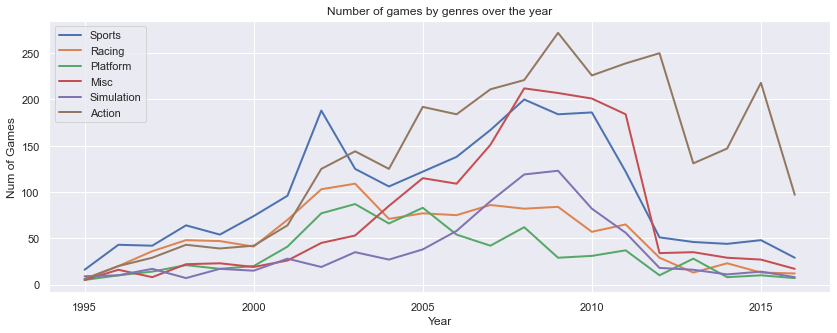

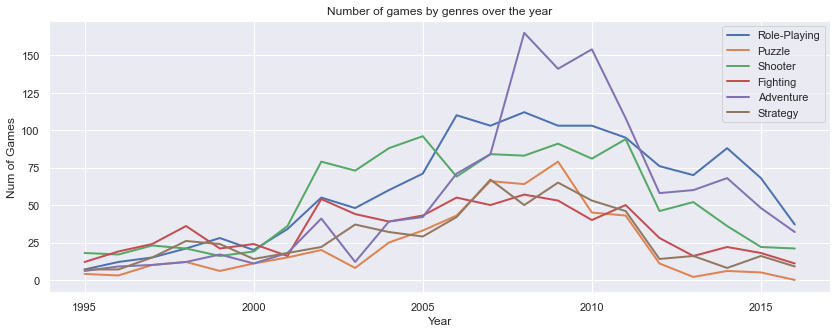

In [172]:
plot_df(df_year_to_genre, "Year", "Num of Games", "Number of games by genres over the year", int(len(df_year_to_genre.columns)/2), linewidth=2)

In [173]:
# Top games each 5 years
years_each = df['Year'].unique()
years_each.sort()
top_games_year = []
for idx, year in enumerate(years_each):
    games = df[(df["Year"] >= year) & (True if len(years_each) >= idx else (df["Year"] < year+1))]
    top_games_year.append(games[games["Global_Sales"] == games["Global_Sales"].max()]["Name"].tolist()[0])

top_games_year

['Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Wii Sports',
 'Mario Kart Wii',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Kinect Adventures!',
 'Grand Theft Auto V',
 'Grand Theft Auto V',
 'Grand Theft Auto V',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops 3',
 'FIFA 17']